In [ ]:
!pip install pandas

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib
import seaborn as sns

In [6]:
print(matplotlib.__version__)

3.8.0


# **Instruction**

Download the Indicators of Heart Disease (2022 UPDATE) Links to an external site.dataset from Kaggle, and load it into your Google Colab. Familiarize yourself with the variables and observations using Pandas. Then, formulate two questions based on your understanding of the dataset. After which, you will need to answer these questions by producing a data visualization of your choice using Matplotlib. Write your observation for each visualization, then take a screenshot of your work (one screenshot per visualization) to be uploaded as your final output.


**heart_2022_with_nans**

In [7]:
file_path = '/content/heart_2022_with_nans.csv'

df = pd.read_csv(file_path, quoting=csv.QUOTE_NONNUMERIC)
df.head(50)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,...,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
6,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,62.60,22.96,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
7,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,1.63,73.48,27.81,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
8,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,NaN,No,...,1.70,NaN,NaN,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No
9,Alabama,Female,Good,1.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.68,81.65,29.05,Yes,NaN,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Question 1:
What is the distribution of sleep hours for males and females separately, and how do their median sleep hours compare?

<ipython-input-49-3ce883aa2a79>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_sleep_counts = df.groupby(['Sex', sleep_categories]).size().unstack()


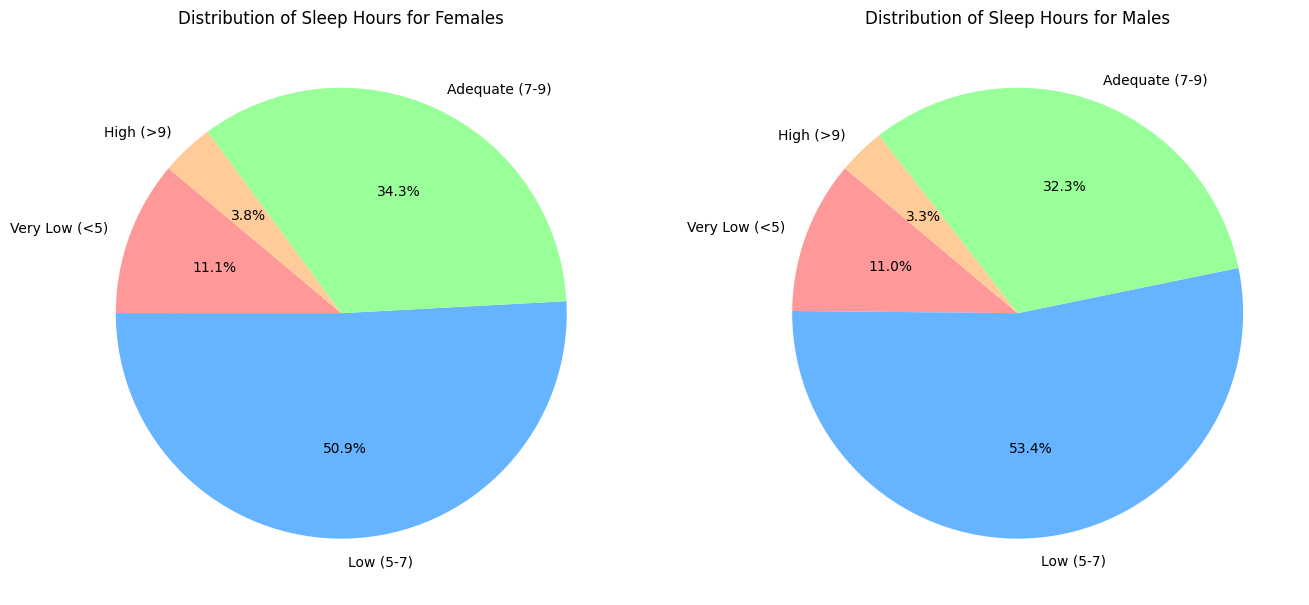

In [49]:
# Multiple Pie Graph
df = pd.read_csv("heart_2022_with_nans.csv", sep=",", on_bad_lines='skip')

# Define sleep categories
sleep_categories = pd.cut(
    df["SleepHours"],
    bins=[0, 5, 7, 9, float('inf')],
    labels=["Very Low (<5)", "Low (5-7)", "Adequate (7-9)", "High (>9)"],
)

# Group by sex and sleep category, then count
sex_sleep_counts = df.groupby(['Sex', sleep_categories]).size().unstack()

# Create a pie chart for each sex
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for females
axes[0].pie(
    sex_sleep_counts.loc['Female'],
    labels=sex_sleep_counts.columns,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]
)
axes[0].set_title("Distribution of Sleep Hours for Females")

# Pie chart for males
axes[1].pie(
    sex_sleep_counts.loc['Male'],
    labels=sex_sleep_counts.columns,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]
)
axes[1].set_title("Distribution of Sleep Hours for Males")

plt.show()

Observation:

The pie charts reveal a similar sleep pattern for both males and females, with a significant portion getting low sleep (5-7 hours) and a substantial number getting adequate sleep (7-9 hours). While females have a slightly higher percentage of low sleepers and a lower percentage of very low sleepers, males have a slightly higher percentage of high sleepers.

Question 2:

How does the distribution of general health differ between males and females across the various health categories (Excellent, Very Good, Good, Fair, Poor)?

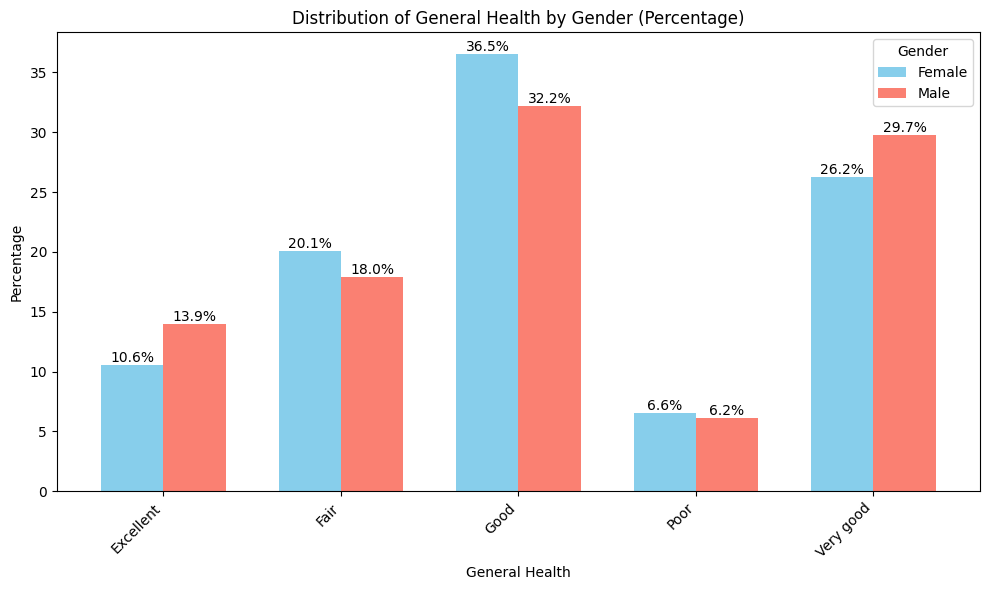

In [10]:
health_gender_counts = df.groupby(['GeneralHealth', 'Sex']).size().unstack(fill_value=0)

# Calculate percentages for GeneralHealth column with each gender
health_gender_percent = health_gender_counts.div(health_gender_counts.sum(axis=0), axis=1) * 100

# Create the grouped bar chart with percentages
fig, ax = plt.subplots(figsize=(10, 6))
health_gender_percent.plot(kind='bar', color=['skyblue', 'salmon'], width=0.7, ax=ax)

# Customize the chart
plt.title('Distribution of General Health by Gender (Percentage)')
plt.xlabel('General Health')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()


Observation:

The bar chart illustrates a similar distribution of general health among males and females, with a majority falling into the "Fair" and "Good" categories. While females show a slightly higher percentage in the "Good" and "Very Good" categories and a lower percentage in the "Poor" category, males have a slightly higher percentage in the "Fair" category.

**heart_2022_no_nans**

In [4]:
file_path2 = '/content/heart_2022_no_nans.csv'

df2 = pd.read_csv(file_path2, quoting=csv.QUOTE_NONNUMERIC)
df2.head(50)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.85,120.20,34.96,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
6,Alabama,Female,Good,3.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,"6 or more, but not all",No,...,1.63,88.00,33.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
7,Alabama,Male,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,Yes,...,1.75,74.84,24.37,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
8,Alabama,Male,Good,2.0,0.0,5 or more years ago,No,6.0,None of them,No,...,1.70,78.02,26.94,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
9,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.68,63.50,22.60,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Question 1:

How does average weight vary by General Health, Sex, and Weight Category?




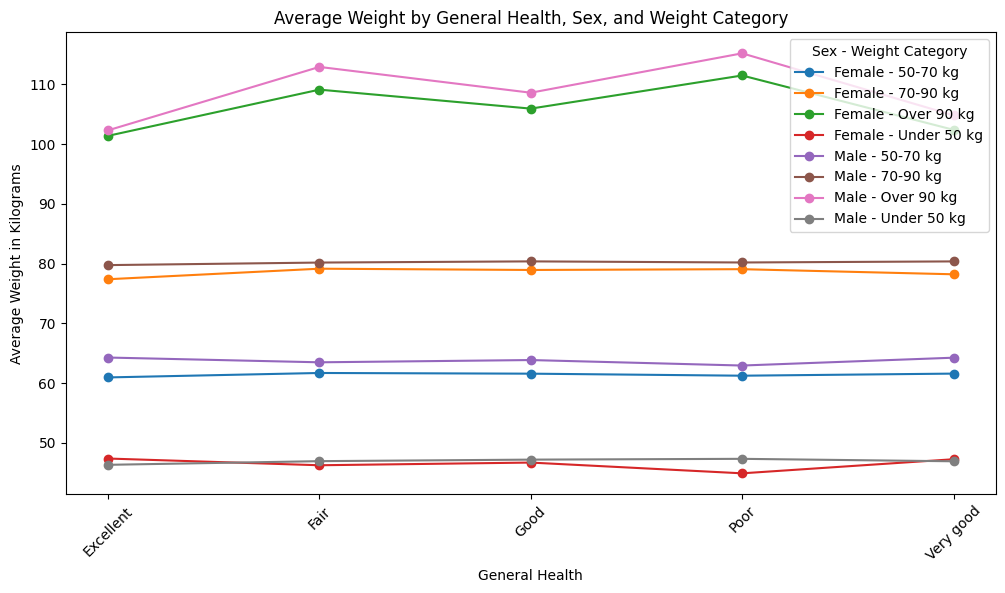

In [26]:
# Multiple Line Plot
df = pd.read_csv('/content/heart_2022_no_nans.csv', usecols=['GeneralHealth', 'WeightInKilograms', 'Sex'])

df['WeightCategory'] = df['WeightInKilograms'].apply(weight_category)

average_weight = df.groupby(['GeneralHealth', 'Sex', 'WeightCategory'])['WeightInKilograms'].mean()
average_weight = average_weight.unstack(level=['Sex', 'WeightCategory'])  # Unstack Sex and WeightCategory for plotting

# Plotting multiple lines for average weight in each category, separated by Sex
plt.figure(figsize=(12, 6))

# Loop Sex and WeightCategory combinations to plot separate lines
for sex in average_weight.columns.levels[0]:
    for weight_cat in average_weight.columns.levels[1]:
        plt.plot(average_weight.index, average_weight[(sex, weight_cat)], marker='o', label=f"{sex} - {weight_cat}")

plt.title("Average Weight by General Health, Sex, and Weight Category")
plt.xlabel("General Health")
plt.ylabel("Average Weight in Kilograms")
plt.xticks(rotation=45)
plt.legend(title="Sex - Weight Category")
plt.show()

Observation:

The line plot reveals distinct trends in average weight across different General Health, Sex, and Weight Category groups. Notably, females generally have lower average weights than males, especially in higher weight categories. Additionally, individuals with Excellent or Very Good health tend to have lower average weights compared to those with Fair or Poor health.

Question 2:

Based on the stacked bar chart, what is the difference in physical activity participation rates between males and females?

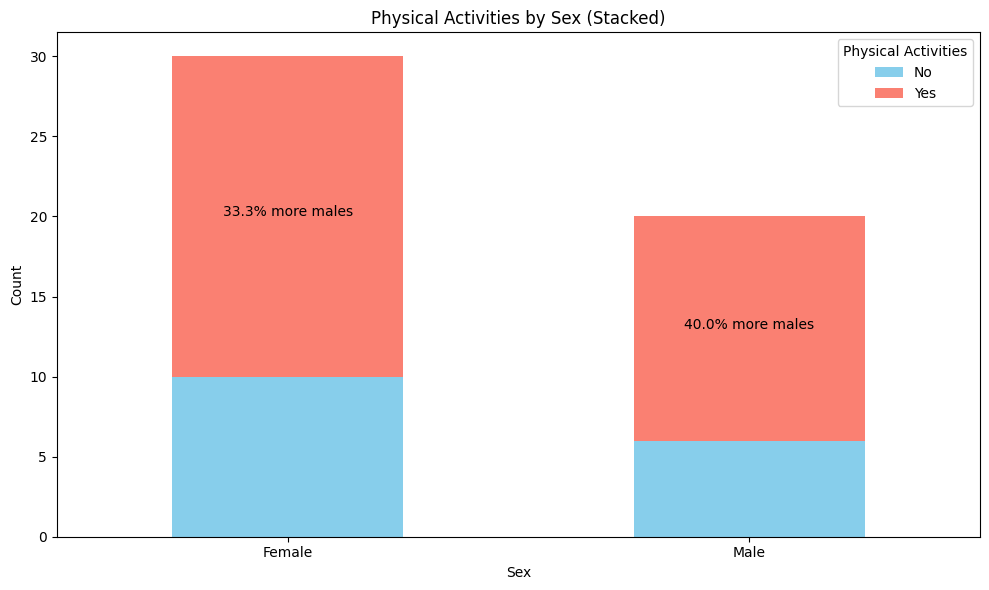

In [50]:
# Stacked Bar Graph
df = pd.read_csv('/content/heart_2022_no_nans.csv', nrows=50, usecols=['Sex', 'PhysicalActivities'])
activity_by_sex = df.groupby(['Sex', 'PhysicalActivities'])['PhysicalActivities'].count().unstack() # unstack convert rows/index labels to column labels

# Get the column names for the two sexes
sex_columns = activity_by_sex.columns

# Calculate the percentage difference
total_counts = activity_by_sex.sum(axis=1)
percentage_diff = (activity_by_sex[sex_columns[0]] - activity_by_sex[sex_columns[1]]) / total_counts * 100

# Create a stacked bar chart
activity_by_sex.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Add percentage difference labels
for i, p in enumerate(activity_by_sex.index):
    if percentage_diff[p] > 0:
        text = f"+{percentage_diff[p]:.1f}% more females"
    elif percentage_diff[p] < 0:
        text = f"{abs(percentage_diff[p]):.1f}% more males" #abs use to convert negative sign to positive
    else:
        text = "Equal count"
    plt.text(i, activity_by_sex.loc[p, sex_columns[0]] + activity_by_sex.loc[p, sex_columns[1]] / 2,
             text, ha='center')

plt.title('Physical Activities by Sex (Stacked)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Physical Activities")
plt.tight_layout()
plt.show()

Observation:

The stacked bar chart illustrates the distribution of physical activity among males and females. Both genders show a higher count of physically active individuals compared to those who are not. However, males have a significantly higher participation rate in both categories.